# Open Exploration for the Base Case

## 1. Introduction

This notebook is the open exploration for the base case. The results are loaded in from a previous experiment run, it includes 1000 scenarios sampled with [Latin Hypercube Sampling](https://www.wikiwand.com/en/Latin_hypercube_sampling). The advantages of LHS is that it is pseudo-random, meaning there is an even spread across the uncertainty ranges. All the policy levers are set to 0.

This notebook gives an indication of what happens in the IJsseldelta when there are no actions taken. This step is analyzed through data visualization. Furthermore, using scenario discovery it is possible to analyze the uncertainties leading to the worst outcomes [(Kwakkel, Auping & Pruyt, 2012)](https://www.sciencedirect.com/science/article/pii/S0040162512002387). PRIM and CART will be used. 

In [23]:
# Load dependencies

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Specific ema_workbench functions
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\newbi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
# Load in self-created visualization functions
from visualization_functions import histogram_maker, mean_outcomes, aggregate_outcomes, scatter_maker, pairplot_maker, boxplot_histogram_maker, boxplot_maker

In [4]:
results = utilities.load_results('Outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\1000ScenariosBaseCase.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,...,0,1.053592,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,...,0,1.091069,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [5]:
# Create an aggregate score of the outcomes over location and time, some visualizations only work on the total score.
aggregate_outcomes(results, "Expected Annual Damage")
aggregate_outcomes(results, "Expected Number of Deaths")

## 2. Data visualization on the base case

Visual examination on the data to have a better understanding of what is happening in the model.

### 2.1 Histogram plots

A distribution of the outcomes over location and timesteps are given. These histograms only showcase the expected annual damages and the expected number of deaths, the costs outcomes are not interesting as they are all 0 in the base case. 

#### 2.1.1 Expected Number of Deaths

Plot Expected Number of Deaths(Histogram)
This is timestep 0


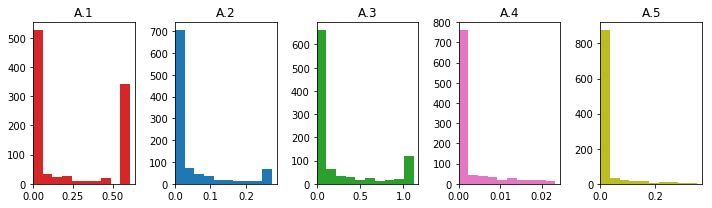

This is timestep 1


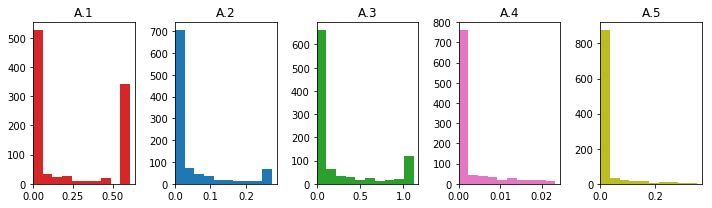

This is timestep 2


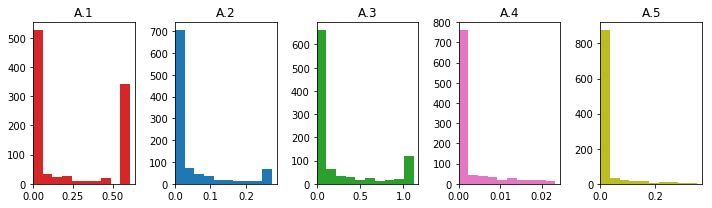

In [6]:
histogram_maker(results, "Expected Number of Deaths")

This histogram (deaths) shows that in a high number of scenarios the deaths are 0. 

However, two locations are interesting to look at in case you search for the worst case: A.1 and A.3. In A.1 there is a very high number of scenarios in which the deaths outcome is relatively high. In A.3 the maximum deaths range is the highest of all locations, while also occuring relatively high.

A.4 is an interesting location as the deaths there are relatively low compared to the other locations.

#### 2.1.2 Expected Annual Damage

Plot Expected Annual Damage(Histogram)
This is timestep 0


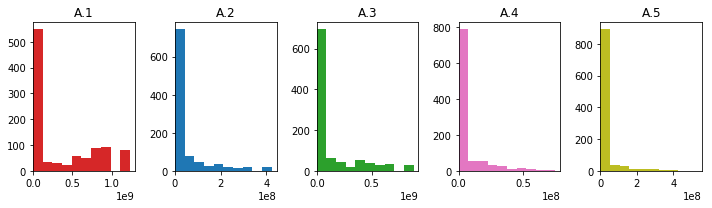

This is timestep 1


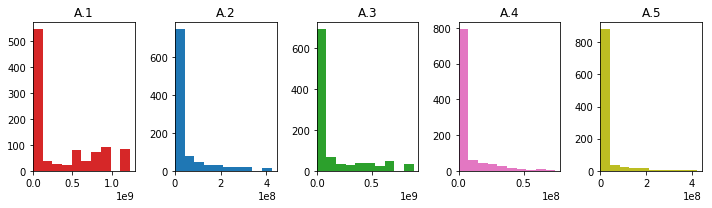

This is timestep 2


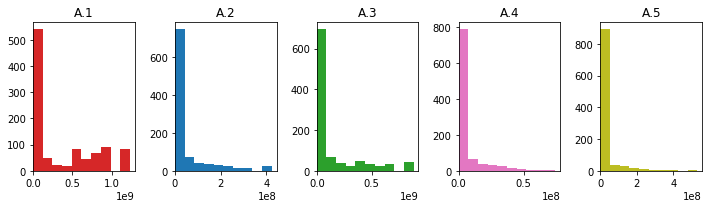

In [7]:
histogram_maker(results, "Expected Annual Damage")

The histogram (damages) corresponds with the deaths histograms. A.1 and A.3 have the highest maximum ranges while A.4 is the lowest.

### 2.2 Mean outcomes

To visualize which location is most heavily impacted across all scenarios the mean is shown over the disaggregated locations and time step. 

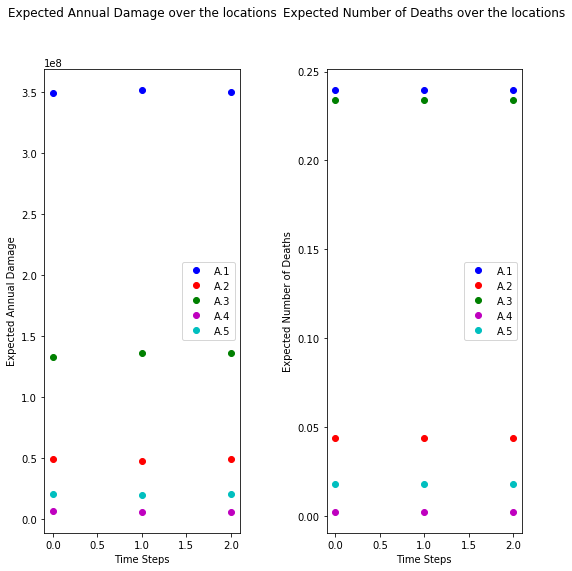

In [8]:
# Select the outcomes you want the mean, for base case the costs are not very interesting.
# outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Expected Evacuation Costs", "RfR Total Costs",
#                 "Dike Investment Costs"]

outcome_names = ["Expected Annual Damage", "Expected Number of Deaths"]

mean_outcomes(results, outcome_names)

The location that is most impacted in this scenario space is A.1, where A.3 comes very close to in expected number of deaths. The gap between best and worst locations are relatively very high. 

### 2.3 Pairplot

A pairplot is a good way to visualize any apparent trade-offs between outcomes. The pairplot is location and time based to keep the interpretability manageable.

In [9]:
# Takes more time to load than other visualizations
interact(pairplot_maker, results=fixed(results), n=[1, 2, 3], location=["A.1", "A.2", "A.3", "A.4", "A.5"]);

interactive(children=(Dropdown(description='location', options=('A.1', 'A.2', 'A.3', 'A.4', 'A.5'), value='A.1…

Some interesting relations to note: the lower the pfail, the higher the damages and deaths. Damages and deaths look to be linearly related to each other. 

In [10]:
# interact(scatter_maker, results=fixed(results), n=fixed(3), outcome=[("Expected Annual Damage"), ("Expected Number of Deaths")]);

# total_outcomes = ["Total Expected Annual Damage", "Total Expected Number of Deaths"]

# boxplot_maker(results, total_outcomes)

# scatter_maker(results, "Expected Annual Damage")
# scatter_maker(results, "Expected Number of Deaths")

## 3. Scenario Discovery

The scenario discovery is performed using PRIM and CART analyses. PRIM is used for the visual inspection of the scenario space wheras CART provides the rules to achieve the interested points. The paper of [Abu-Hanna, Nannings, Dongelmans, Hasman (2010)](https://www.sciencedirect.com/science/article/pii/S1532046410000675) discusses the distinction between PRIM and CART. Theoretically, CART has a higher greediness in using data. A [greedy algorithm](https://www.wikiwand.com/en/Greedy_algorithm) is one which makes the most optimal decision at that given time. Abu-Hanna, et al. (2010) furthermore mentioned that PRIM performed worse in their case study. Our reasoning for applying CART as well is that the boxes of PRIM were not satisfactory. However, PRIM analyses remained to create a better intuitive understanding of the scenario space through visual inspection. 

The goal of this scenario discovery is to find the uncertainty ranges of the worst scenarios in the base case.

Total Expected Number of Deaths First quartile (0.25): 0.614663518226044
Total Expected Number of Deaths Last quartile (0.75): 2.077220143192424
Total Expected Number of Deaths Mean: 1.61575355331798
Total Expected Annual Damage First quartile (0.25): 583888960.7998052
Total Expected Annual Damage Last quartile (0.75): 2620031202.2241116
Total Expected Annual Damage Mean: 1678899372.4850564


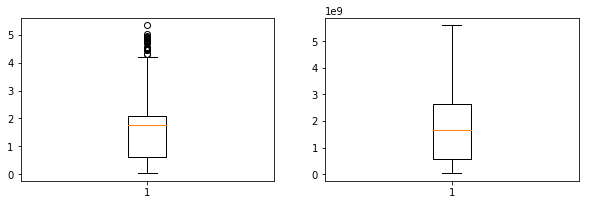

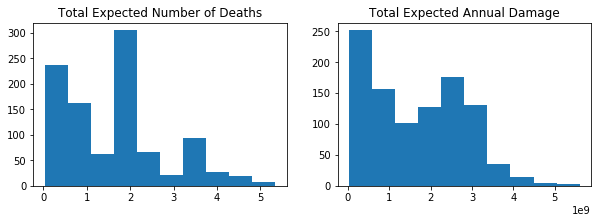

In [11]:
boxplot_histogram_maker(results)

A quick visual inspection shows the distribution and the boxplots of the total aggregated damages and deaths. This is important to identify your interested points, in the current project the right-end of the histogram is worrying. 

### 3.1 Scenario Discovery on Deaths

This focuses on the interested points of deaths above the 85th percentile (> 3.17). Mainly because the range of the boxplot (upper limit of the box) could not provide the right number of coverage, assumption is that the boxplot value was still too low to  identify the critical uncertainties causing the high number of deaths.

In [12]:
x = results.iloc[:, :19] # Only take the uncertentainties 

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths > np.percentile(y_deaths, 85)

[MainProcess/INFO] 1000 points remaining, containing 150 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.094, coverage: 0.6266666666666667, density: 1.0 restricted_dimensions: 3


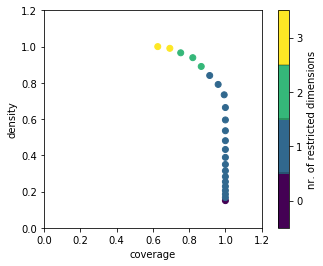

In [13]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.626667
density            1
id                22
mass           0.094
mean               1
res_dim            3
Name: 22, dtype: object

             box 22                                          
                min       max                       qp values
A.3_pfail  0.000048  0.144188   [-1.0, 4.840687032040365e-69]
A.1_pfail  0.345671  0.999122  [2.1161879348389605e-06, -1.0]
A.2_pfail  0.081178  0.999189     [0.06728957532293703, -1.0]



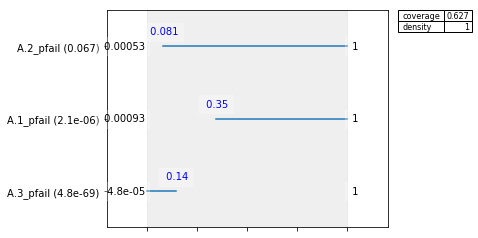

In [14]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

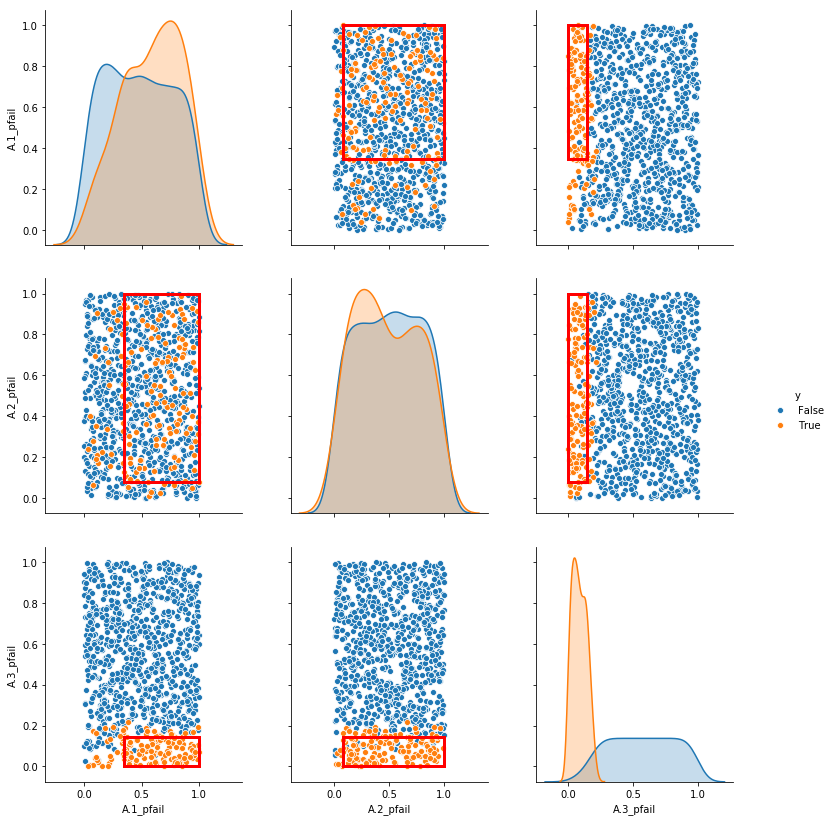

In [15]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

PRIM visual box analyses showed us that when A.3_pfail is in the lower ranges (0 - 0.15) the deaths are very high. 

In [17]:
cart_alg = cart.CART(x, y_deaths, 0.05)
cart_alg.build_tree()


# Make sure to have GraphViz installed for the tree to show up (https://www.graphviz.org/download/)
fig = cart_alg.show_tree()
fig.set_size_inches(12, 12)
plt.show()

The CART-tree visualizes the rules. For the next step, MORO, the uncertainty ranges have been tweaked based on these CART rules in combination with damages. The rules indicate under which scenarios there are a high number of deaths, meaning MORO will be run in the worst scenario space based on the base case.

### 3.2 Scenario Discovery on Damages

The same steps are applied to damages.

In [18]:
y_damages = results['Total Expected Annual Damage'].values
y_damages = y_damages > np.percentile(y_damages, 90)

[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.5555555555555556, mass: 0.099, coverage: 0.55, density: 0.5555555555555556 restricted_dimensions: 5


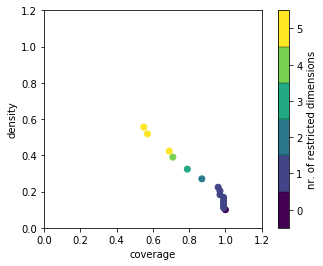

In [19]:
prim_alg = prim.Prim(x, y_damages, threshold=0.50, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage        0.55
density     0.555556
id                14
mass           0.099
mean        0.555556
res_dim            5
Name: 14, dtype: object

                          box 14                   \
                             min              max   
A.1_pfail            0.000930847         0.390932   
A.1_Bmax                 30.0525          306.718   
discount rate 0       {1.5, 2.5}       {1.5, 2.5}   
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   

                                                 
                                      qp values  
A.1_pfail         [-1.0, 2.964769179127261e-12]  
A.1_Bmax             [-1.0, 0.2948623204315433]  
discount rate 0  [0.00041716064300372933, -1.0]  
discount rate 2     [0.03352579193830987, -1.0]  
discount rate 1     [0.04338951713545395, -1.0]  



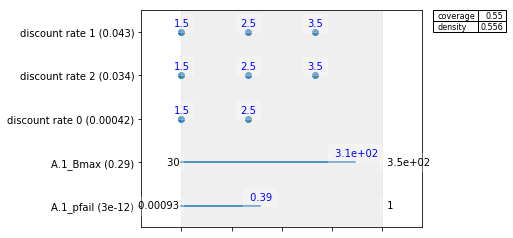

In [20]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

discount rate 0 [1.5, 2.5, 3.5, 4.5]
discount rate 1 [1.5, 2.5, 3.5, 4.5]
discount rate 2 [1.5, 2.5, 3.5, 4.5]


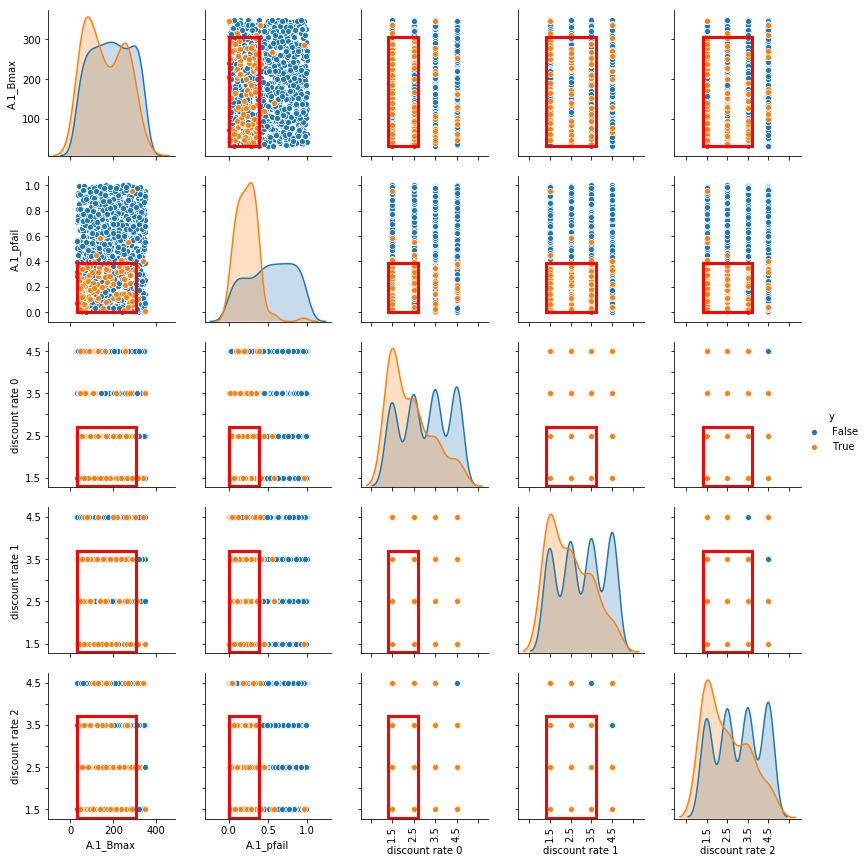

In [21]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [22]:
cart_alg = cart.CART(x, y_damages, 0.05)
cart_alg.build_tree()

fig = cart_alg.show_tree()
fig.set_size_inches(12, 12)
plt.show()